In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, SpectralEmbedding
from sklearn.decomposition import KernelPCA, PCA
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
# dataset directory

digits = load_digits()

In [ ]:
# display feature columns

display(pd.DataFrame(digits.data))

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
# display target column

display(pd.DataFrame(digits.target))

,0
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


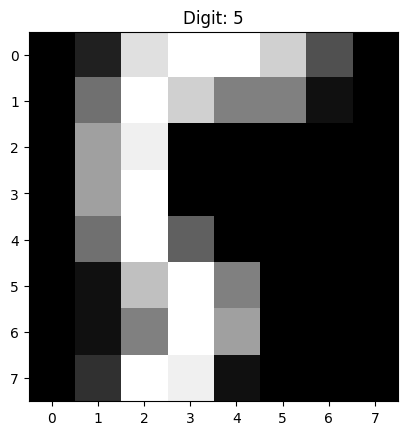

In [ ]:
# display data point

plt.imshow((digits.data[155].reshape(8, 8)), cmap='gray')
plt.title(f'Digit: {digits.target[155]}')
plt.show()

In [ ]:
# set feature and output values

x = digits.data
y = digits.target

# Dimensionality Reduction Techniques

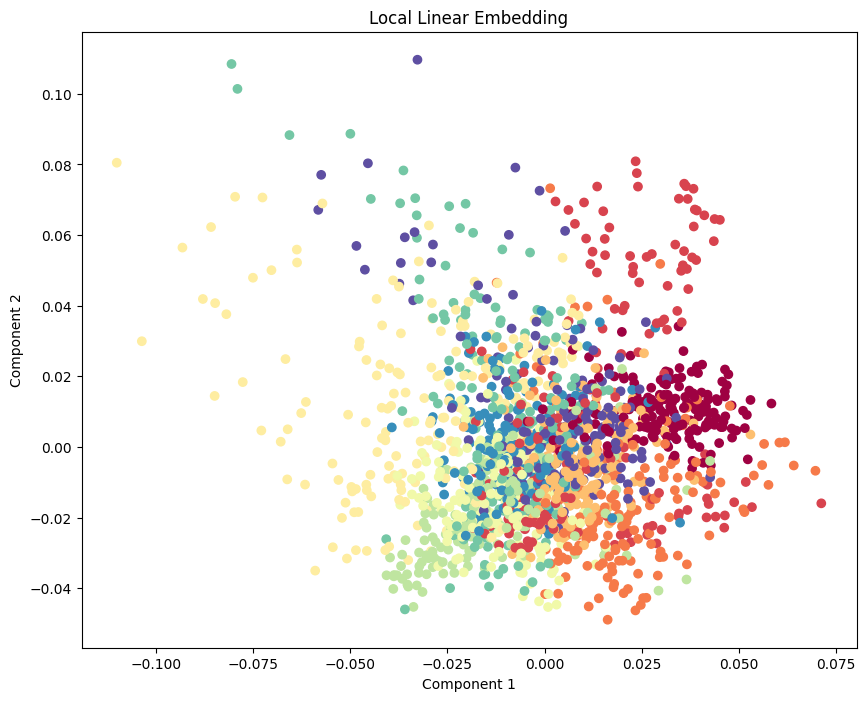

In [ ]:
# Local Linear Embedding

lle_pipeline = make_pipeline(StandardScaler(),
                         LocallyLinearEmbedding(n_neighbors=200,random_state=0))

lle_pipeline.fit(x,y)

lle_x = lle_pipeline.transform(x)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(lle_x[:, 0], lle_x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Local Linear Embedding')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

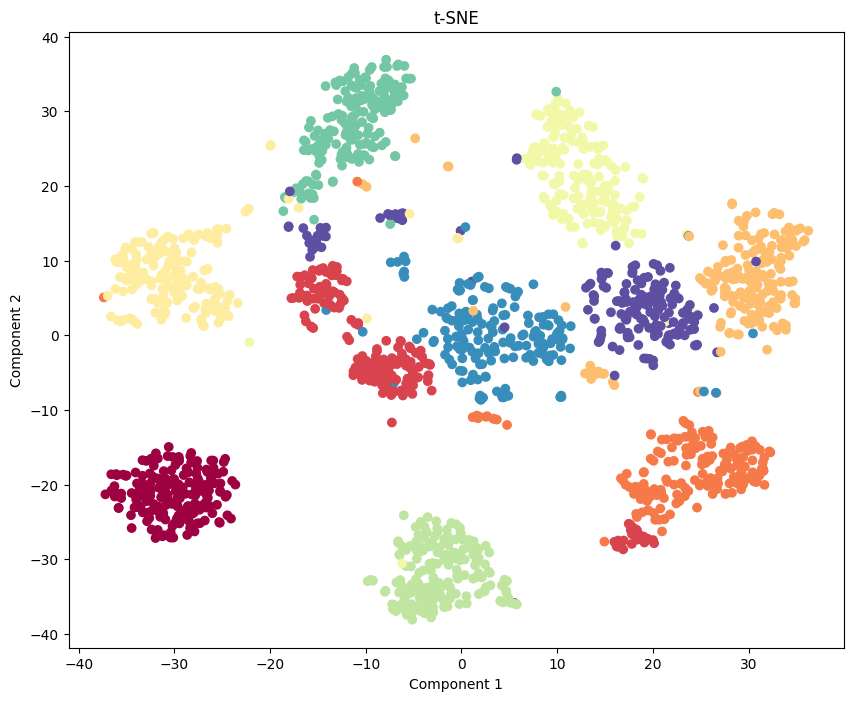

In [ ]:
# t-Distributed Stochastic Neighbor Embedding (t-SNE)

tsne_pipeline = make_pipeline(StandardScaler(),
                         TSNE(perplexity = 50, random_state = 0)).fit_transform(x,y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_pipeline[:, 0], tsne_pipeline[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('t-SNE')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

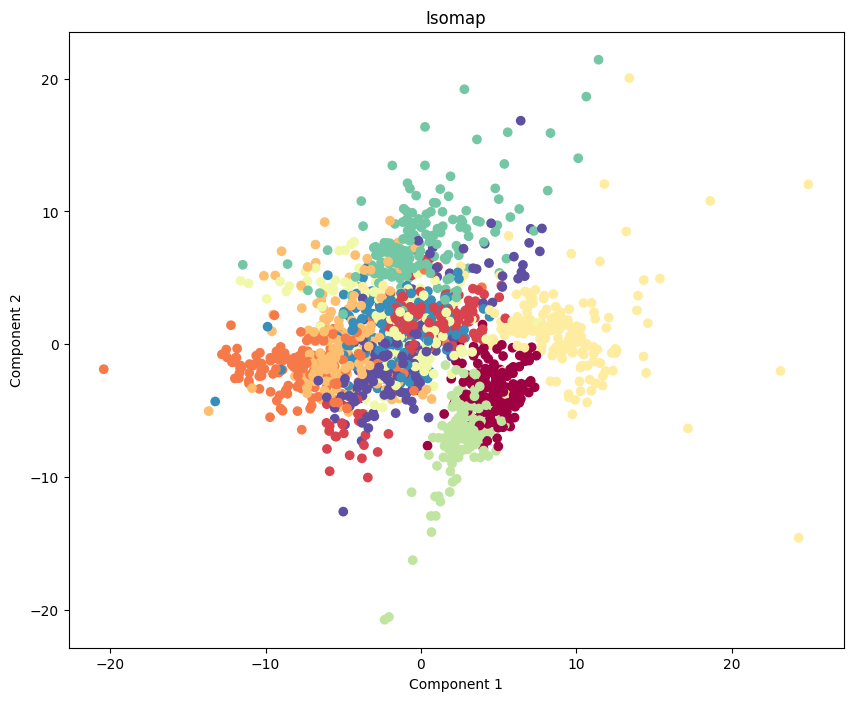

In [ ]:
# Isomap

isomap_pipeline = make_pipeline(StandardScaler(),
                         Isomap(n_neighbors=200))

isomap_pipeline.fit(x,y)

isomap_x = isomap_pipeline.transform(x)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(isomap_x[:, 0], isomap_x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Isomap')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

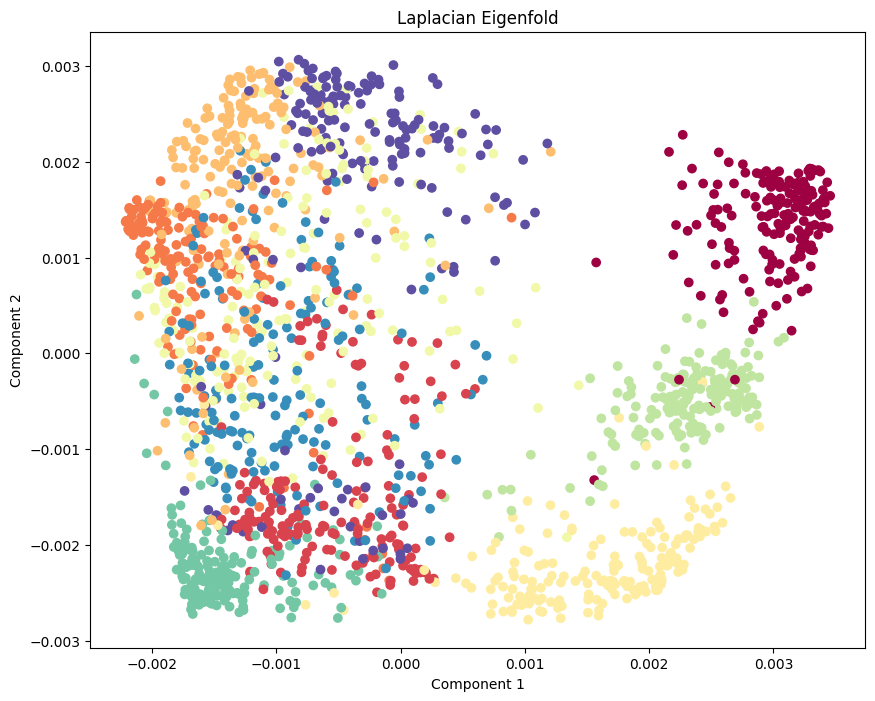

In [ ]:
# Laplacian Eigenmap/Spectral Embedding

LE_pipeline = make_pipeline(StandardScaler(),
                         SpectralEmbedding(n_neighbors=200)).fit_transform(x,y)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(LE_pipeline[:, 0], LE_pipeline[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Laplacian Eigenfold')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

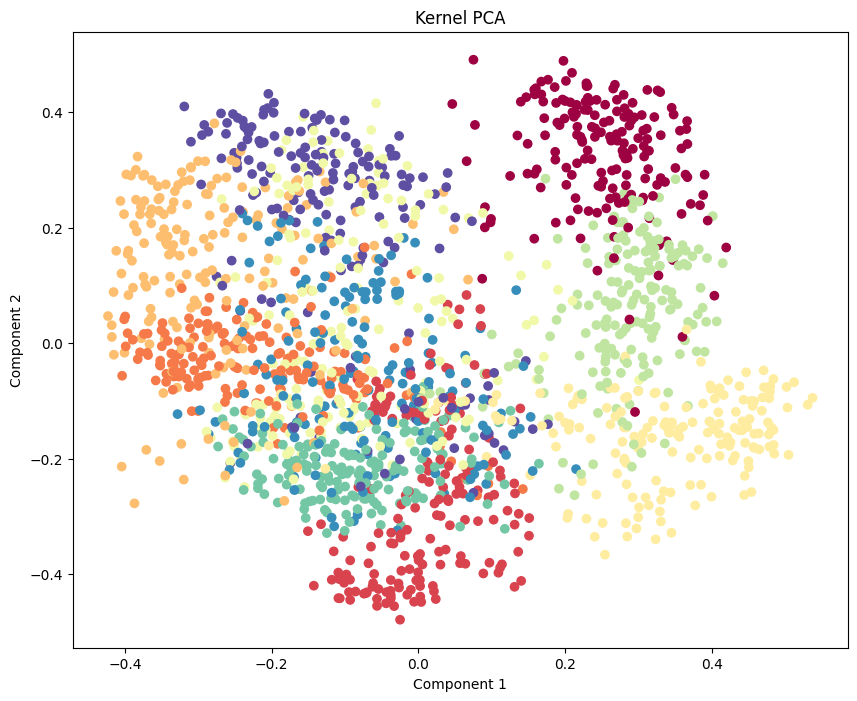

In [ ]:
# Kernel PCA

kpca_pipeline = make_pipeline(StandardScaler(),
                         KernelPCA(kernel='rbf', gamma=0.01))

kpca_pipeline.fit(x,y)

kpca_x = kpca_pipeline.transform(x)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(kpca_x[:, 0], kpca_x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('Kernel PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

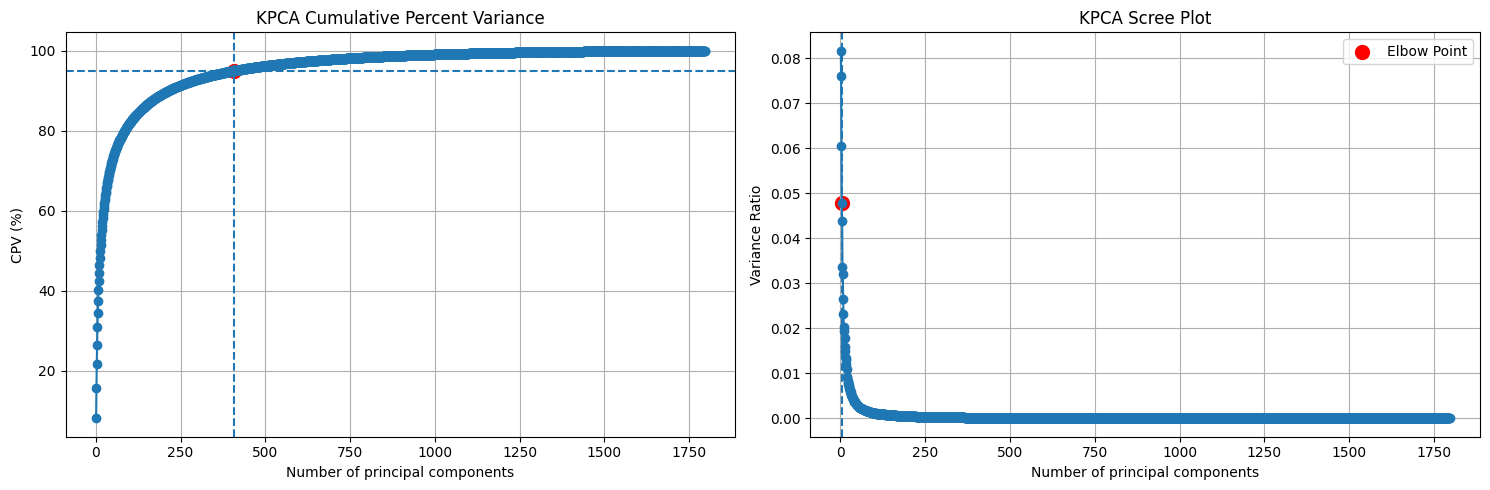

Components needed for ≥95% variance: 408
Elbow located at component: 4


In [ ]:
kpca = kpca_pipeline.named_steps['kernelpca']
eigenvalues = kpca.eigenvalues_
kpca_var = eigenvalues/np.sum(eigenvalues)
kpca_cpv = np.cumsum(kpca_var) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# cpv threshold value
threshold = 95
n_components_needed = np.searchsorted(kpca_cpv, threshold) + 1

# cpv plot
ax1.plot(range(1, len(kpca_cpv)+1), kpca_cpv, marker='o')
ax1.scatter([n_components_needed], [kpca_cpv[n_components_needed-1]], color='red', s=100)
ax1.axhline(threshold, linestyle='--')
ax1.axvline(n_components_needed, linestyle='--')
ax1.set_title('KPCA Cumulative Percent Variance')
ax1.set_xlabel('Number of principal components')
ax1.set_ylabel('CPV (%)')
ax1.grid(True)

# scree plot elbow detection
d1 = np.diff(kpca_var)
d2 = np.diff(d1)
elbow = np.argmax(d2) + 2

# scree plot
ax2.plot(range(1, len(kpca_var)+1), kpca_var, marker='o')
ax2.scatter(elbow, kpca_var[elbow-1], color='red', s=100, label='Elbow Point')
ax2.axvline(elbow, linestyle='--')
ax2.set_title('KPCA Scree Plot')
ax2.set_xlabel('Number of principal components')
ax2.set_ylabel('Variance Ratio')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Components needed for ≥{threshold}% variance:", n_components_needed)
print("Elbow located at component:", elbow)

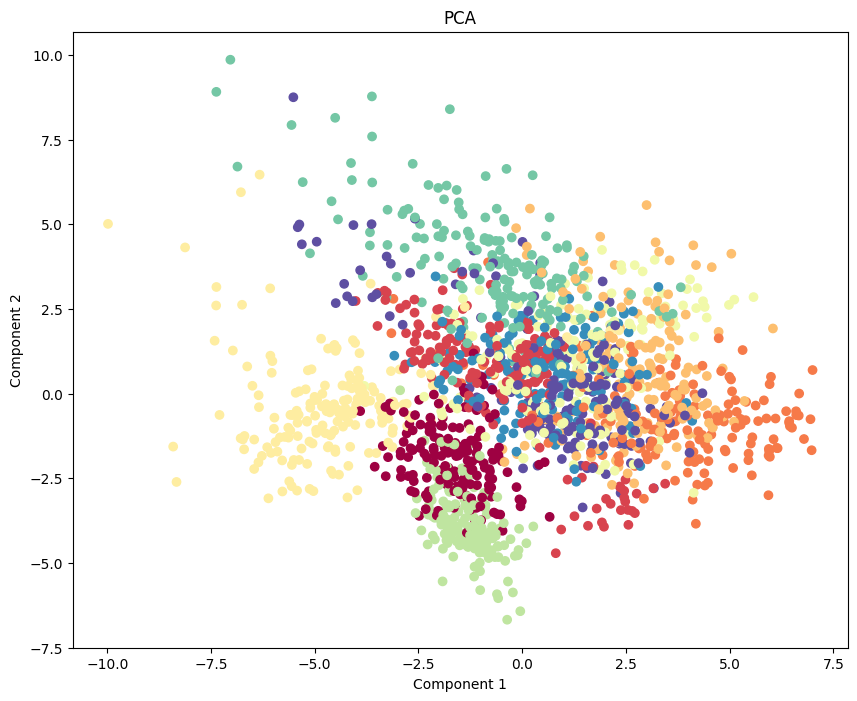

In [ ]:
# PCA

pca_pipeline = make_pipeline(StandardScaler(), PCA())

pca_pipeline.fit(x,y)

pca_x = pca_pipeline.transform(x)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_x[:, 0], pca_x[:, 1], c=y, cmap=plt.cm.Spectral)
plt.title('PCA')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

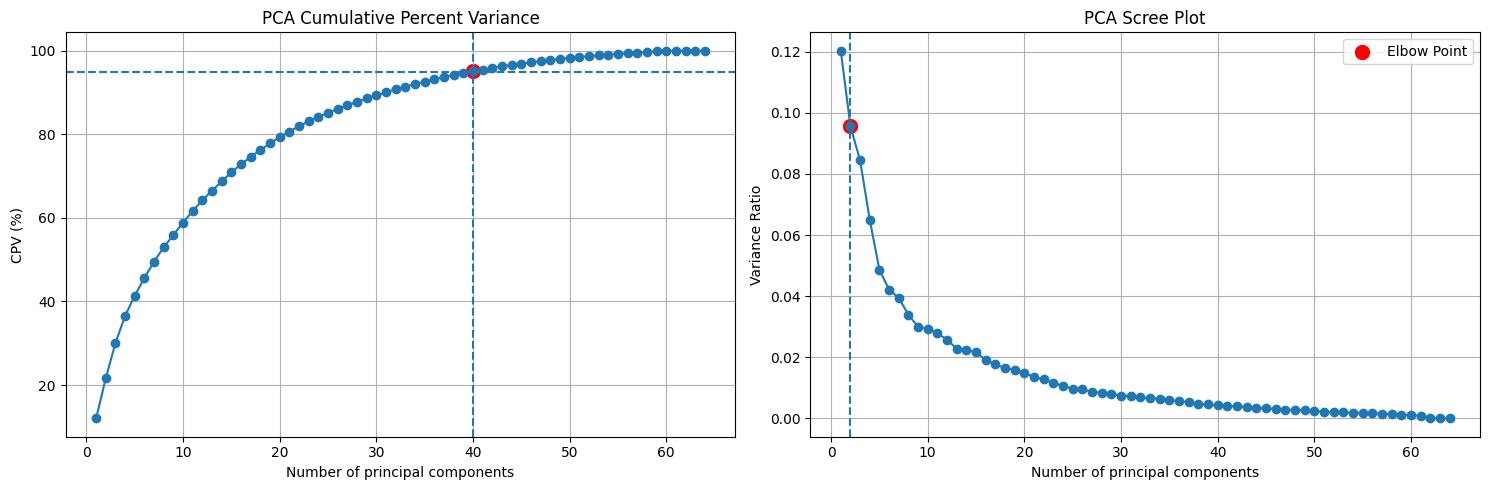

Components needed for ≥95% variance: 40
Elbow located at component: 2


In [ ]:
pca = pca_pipeline.named_steps['pca']
pca_var = pca.explained_variance_ratio_
pca_cpv = np.cumsum(pca_var) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# cpv threshold value
threshold = 95
n_components_needed = np.searchsorted(pca_cpv, threshold) + 1

# cpv plot
ax1.plot(range(1, len(pca_cpv)+1), pca_cpv, marker='o')
ax1.scatter([n_components_needed], [pca_cpv[n_components_needed-1]], color='red', s=100)
ax1.axhline(threshold, linestyle='--')
ax1.axvline(n_components_needed, linestyle='--')
ax1.set_title('PCA Cumulative Percent Variance')
ax1.set_xlabel('Number of principal components')
ax1.set_ylabel('CPV (%)')
ax1.grid(True)

# scree plot elbow detection
d1 = np.diff(pca_var)
d2 = np.diff(d1)
elbow = np.argmax(d2) + 2

# scree plot
ax2.plot(range(1, len(pca_var)+1), pca_var, marker='o')
ax2.scatter(elbow, pca_var[elbow-1], color='red', s=100, label='Elbow Point')
ax2.axvline(elbow, linestyle='--')
ax2.set_title('PCA Scree Plot')
ax2.set_xlabel('Number of principal components')
ax2.set_ylabel('Variance Ratio')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

print(f"Components needed for ≥{threshold}% variance:", n_components_needed)
print("Elbow located at component:", elbow)

As can be seen from the scatter plot visualizations, t-SNE shows the most promising results, where differentiated classes were satisfactorily distributed into local regions throughout the 2D space, with minimal overlaps.

On the other hand, all other techniques show strongly overlapping classes, which show difficulty in differentiating classes.

# Classification With vs Without Dimensionality Reduction

In [ ]:
# train-test split 70/30

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

### Kernel PCA (Dimensionality Reduction) + SVM (Classification)

In [ ]:
kpca_svc_pipline = make_pipeline(StandardScaler(),
                         KernelPCA(kernel='sigmoid', n_components=40),
                         SVC())

kpca_svc_pipline.fit(X_train, y_train)

y_pred = kpca_svc_pipline.predict(X_test)

KPCA+SVM Accuracy: 0.9888888888888889
KPCA+SVM F1 Score: 0.9889024693382535


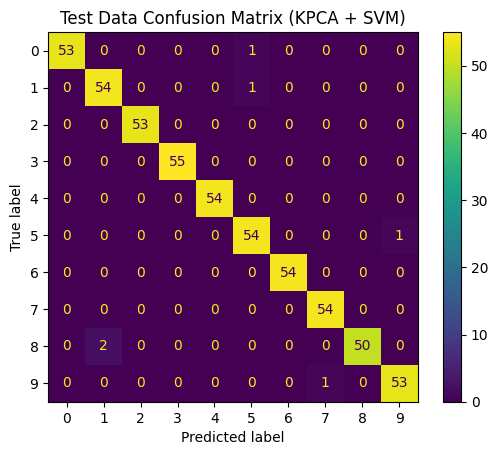

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.96      0.98      0.97        55
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        54
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        54
           8       1.00      0.96      0.98        52
           9       0.98      0.98      0.98        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
print(f'KPCA+SVM Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'KPCA+SVM F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.sort(np.unique(y)))
cm_display.plot()
plt.title('Test Data Confusion Matrix (KPCA + SVM)')
plt.show()

print(classification_report(y_test, y_pred))

### Linear Discriminant Analysis (Dimensionality Reduction) + SVM (Classification)

In [ ]:
n_classes = len(np.unique(y))
n_features = x.shape[1]

max_lda_components = min(n_classes - 1, n_features)

print(f"Number of classes (digits): {n_classes}")
print(f"Number of original features: {n_features}")
print(f"Maximum number of components LDA can extract: {max_lda_components}")

if n_classes - 1 > n_features:
    print(f"Since n_features ({n_features}) < (n_classes - 1) ({n_classes - 1}), LDA is limited by the number of features.")
else:
    print(f"Since (n_classes - 1) ({n_classes - 1}) < n_features ({n_features}), LDA is limited by the number of classes.")

print(f"Therefore, you can extract at most {min(n_classes - 1, n_features)} components from LDA with this dataset.")

Number of classes (digits): 10
Number of original features: 64
Maximum number of components LDA can extract: 9
Since (n_classes - 1) (9) < n_features (64), LDA is limited by the number of classes.
Therefore, you can extract at most 9 components from LDA with this dataset.


In [ ]:
lda_svc_pipline = make_pipeline(StandardScaler(),
                         LinearDiscriminantAnalysis(n_components=max_lda_components),
                         SVC())

lda_svc_pipline.fit(X_train, y_train)

y_pred = lda_svc_pipline.predict(X_test)

LDA+SVM Accuracy: 0.9629629629629629
LDA+SVM F1 Score: 0.9631459521995476


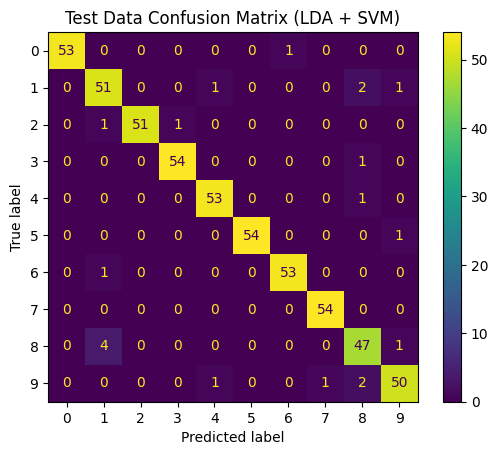

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.89      0.93      0.91        55
           2       1.00      0.96      0.98        53
           3       0.98      0.98      0.98        55
           4       0.96      0.98      0.97        54
           5       1.00      0.98      0.99        55
           6       0.98      0.98      0.98        54
           7       0.98      1.00      0.99        54
           8       0.89      0.90      0.90        52
           9       0.94      0.93      0.93        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



In [ ]:
print(f'LDA+SVM Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'LDA+SVM F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.sort(np.unique(y)))
cm_display.plot()
plt.title('Test Data Confusion Matrix (LDA + SVM)')
plt.show()

print(classification_report(y_test, y_pred))

Given that LDA is a supervised learning dimensionality reduction method, it aims to maximize the separability between n classes, thus there should be a maximum of n-1 hyperplanes or components that separate the n classes.

However, it can choose components < n to futher reduce dimensions and reduce noise.

Moreover, the number of components also cannot be more than k features.

Hence, the `n_components = min(n_classes-1, n_features)` for `LinearDiscriminantAnalysis`.

For this given dataset, LDA can extract a maximum of 9 components.

### SVM (Classification w/out Dimensionality Reduction)

In [ ]:
svc_pipline = make_pipeline(StandardScaler(),
                         SVC())

svc_pipline.fit(X_train, y_train)

y_pred = svc_pipline.predict(X_test)

SVM Accuracy: 0.9833333333333333
SVM F1 Score: 0.9833420813264124


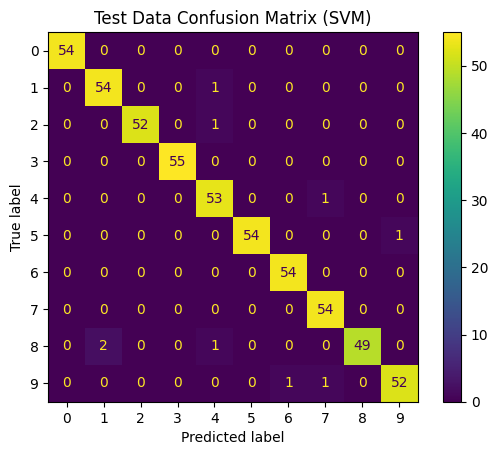

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      0.98      0.97        55
           2       1.00      0.98      0.99        53
           3       1.00      1.00      1.00        55
           4       0.95      0.98      0.96        54
           5       1.00      0.98      0.99        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.94      0.97        52
           9       0.98      0.96      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [ ]:
print(f'SVM Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'SVM F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

cfm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = np.sort(np.unique(y)))
cm_display.plot()
plt.title('Test Data Confusion Matrix (SVM)')
plt.show()

print(classification_report(y_test, y_pred))

### Discussion

All methods show promising metrics, with their results comparable to each other. However, a dimensionality reduction of Kernel PCA with SVM as classifier topped the other methods in both accuracy and F1 score.

| Method | Accuracy | F1 Score |
| :------- | :------: | -------: |
| KPCA+SVM | 0.98888 | 0.98890 |
| LDA+SVM | 0.96296 | 0.96315 |
| SVM | 0.98333 | 0.98334 |

Kernel PCA proved most effective due to its ability to perform the kernel trick that maps the dataset to a higher dimension, making it capable of uncovering more complex and nonlinear relationships in the dataset.

On the other hand, LDA is a linear technique. Although it is supervised and has knowledge of the target variable, it is unable to determine nonlinear relationships in the dataset.

Standalone SVM is an effective classification technique, but given the numerous features and high-dimensional feature space of the digits dataset, a dimensionality reduction by KPCA improved on its already effective algorithm.